# inicializando funcoes

In [1]:
import math
import numpy
import numpy as np
import matplotlib.pyplot as plt
import modules.SimulacaoKTz as ktzsim

# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits
    if coeff != 1.0:
        return r"{0:.{2}f}\cdot10^{{{1:d}}}".format(coeff, exponent, precision)
    return r"10^{{{0:d}}}".format(exponent)

def select_rows(X,n_rows):
    return X[np.floor(np.linspace(0,X.shape[0]-1,n_rows)).astype(int),:]

def select_cols(X,n_cols):
    return X[:,np.floor(np.linspace(0,X.shape[0]-1,n_cols)).astype(int)]

def select_elem(X,n_el):
    return X[np.floor(np.linspace(0,X.shape[0]-1,n_el)).astype(int)]

def delete_elem(X,x):
    k = np.nonzero(X==x)[0]
    if k.size > 0:
        return np.delete(X,k)
    return X

# magnetizacao em funcao do campo K=0

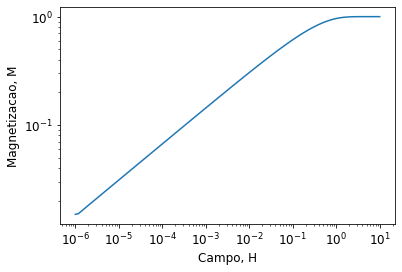

In [14]:

#define parametros fase ferromagnetica (ver diagrama KT no plano de trabalho)

K             = 0.0
T             = 1.0
delta         = 0.0
lamb          = 0.0
xR            = 0.0
t_transiente  = 10000
t_total       = 20000
x0            = numpy.array([1.0,1.0],dtype=numpy.float64)
H_valores     = np.logspace(-6,1,100)
mapa_nome     = 'kttanh'



x       = ktzsim.RodaSimulacao_Varios_H(K,T,delta,lamb,xR,H_valores,t_transiente,t_total,x0,mapa_nome,num_repete_bootstrap=0)[0]

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(H_valores,x)
ax.set_xlabel('Campo, H')
ax.set_ylabel('Magnetizacao, M')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


# magnetizacao em funcao do tempo K=0.2

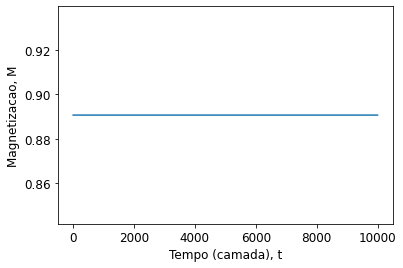

In [15]:

#define parametros fase ferromagnetica (ver diagrama KT no plano de trabalho)

K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome    = 'kttanh'



x       = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,0.0,0.0,t_transiente,t_total,x0,mapa_nome)
t_dados = np.arange(x.shape[0])

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(t_dados,x[:,0])
ax.set_xlabel('Tempo (camada), t')
ax.set_ylabel('Magnetizacao, M')
plt.show()


# Magnetizacao em funcao da temperatura K=0.2

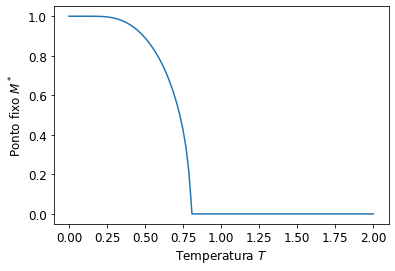

In [16]:
K     = 0.2
T     = 0.5
delta = 0.0
lamb  = 0.0
xR    = 0.0
H     = 0.0
t_transiente = 10000
t_total      = 20000
x0           = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome    = 'kttanh'


def lineariza_lista(lst):
    return [ m for m_l in lst for m in m_l ]

T_valores = np.linspace(0.0001,2,100)

x_dados = []
T_dados = []
for T in T_valores:
    x  = ktzsim.RodaSimulacaoMapa(K,T,delta,lamb,xR,H,0.0,0.0,t_transiente,t_total,x0,mapa_nome)
    x_unico = np.unique(x[:,0])
    x_dados.append(x_unico)
    T_dados.append(T * np.ones(x_unico.size))

T_dados = np.array(lineariza_lista(T_dados))
x_dados = np.array(lineariza_lista(x_dados))

plt.plot(T_dados,x_dados,'-')
plt.xlabel(r'Temperatura $T$')
plt.ylabel(r'Ponto fixo $M^*$')
plt.show()

# magnetizacao vs temperatura -- varios K

K = 0.0
K = 0.3
K = 0.5


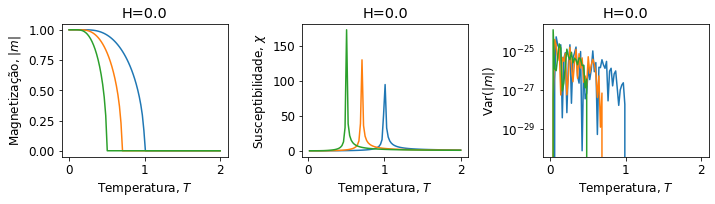

In [17]:
K_valores        = [ 0.0, 0.3, 0.5 ] #[ 0.0, 0.3, 0.5, 0.6, 1.5 ]
T_valores        = np.linspace(0.001,2,100) #T     = 0.5
delta            = 0.0
lamb             = 0.0
xR               = 0.0
H                = 0.0000
t_transiente     = 10000
t_total          = 20000
x0               = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome        = 'kttanh'
usar_modulo_de_m = True


xm_dados, xvar_dados, xvarstd_dados, xsuscept_dados = [],[],[],[]

for K in K_valores:
    print('K =', K)
    x_media, x_var, x_var_std, x_suscept = ktzsim.RodaSimulacao_Varios_T(K,T_valores,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome,seguir_ponto_fixo=True,usar_modulo_de_m=usar_modulo_de_m,num_repete_bootstrap=0)
    xm_dados.append(       x_media   )
    xvar_dados.append(     x_var     )
    xvarstd_dados.append(  x_var_std )
    xsuscept_dados.append( x_suscept )

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
for i,K in enumerate(K_valores):
    ax[0].plot(T_valores,         xm_dados[i]           , label=f'K={K}')
    ax[1].plot(T_valores,   xsuscept_dados[i]           , label=f'K={K}')
    ax[2].plot(T_valores,       xvar_dados[i]/T_valores , label=f'K={K}')
ax[0].set_xlabel( 'Temperatura, $T$')
ax[0].set_ylabel( 'Magnetização, $|m|$')
ax[0].set_title( f'H={H}')
ax[1].set_xlabel( 'Temperatura, $T$')
ax[1].set_ylabel(r'Susceptibilidade, $\chi$')
ax[1].set_title( f'H={H}')
ax[2].set_xlabel( 'Temperatura, $T$')
ax[2].set_ylabel(r'Var($|m|$)')
ax[2].set_title( f'H={H}')
ax[2].set_yscale('log')

plt.tight_layout()
plt.show()

# magnet vs temper -- K < e > 0.5

K = 0.0
K = 0.3
K = 0.5
K = 0.6
K = 1.5


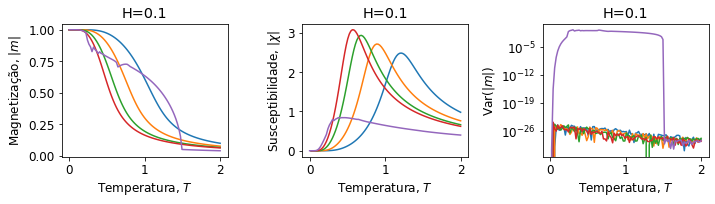

In [18]:
import numpy
import matplotlib.pyplot as plt
import modules.SimulacaoKTz as ktzsim
np = numpy

K_valores        = [ 0.0, 0.3, 0.5, 0.6, 1.5 ]
T_valores        = np.linspace(0.001,2,100) #T     = 0.5
delta            = 0.0
lamb             = 0.0
xR               = 0.0
H                = 0.1
t_transiente     = 10000
t_total          = 20000
x0               = numpy.array([1.0,1.0],dtype=numpy.float64)
mapa_nome        = 'kttanh'
usar_modulo_de_m = True


xm_dados, xvar_dados, xvarstd_dados, xsuscept_dados = [],[],[],[]

for K in K_valores:
    print('K =',K)
    x_media, x_var, x_var_std, x_suscept = ktzsim.RodaSimulacao_Varios_T(K,T_valores,delta,lamb,xR,H,t_transiente,t_total,x0,mapa_nome,seguir_ponto_fixo=True,usar_modulo_de_m=usar_modulo_de_m,num_repete_bootstrap=0)
    xm_dados.append(       x_media   )
    xvar_dados.append(     x_var     )
    xvarstd_dados.append(  x_var_std )
    xsuscept_dados.append( x_suscept )

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
for i,K in enumerate(K_valores):
    ax[0].plot(T_valores,       xm_dados[i]           , label=f'K={K}')
    ax[1].plot(T_valores, np.abs(xsuscept_dados[i])   , label=f'K={K}')
    ax[2].plot(T_valores,     xvar_dados[i]/T_valores , label=f'K={K}')
ax[0].set_xlabel( 'Temperatura, $T$')
ax[0].set_ylabel( 'Magnetização, $|m|$')
ax[0].set_title( f'H={H}')
ax[1].set_xlabel( 'Temperatura, $T$')
ax[1].set_ylabel(r'Susceptibilidade, $|\chi|$')
ax[1].set_title( f'H={H}')
ax[2].set_xlabel( 'Temperatura, $T$')
ax[2].set_ylabel(r'Var($|m|$)')
ax[2].set_title( f'H={H}')
ax[2].set_yscale('log')

plt.tight_layout()
plt.show()

# autocorrelacao

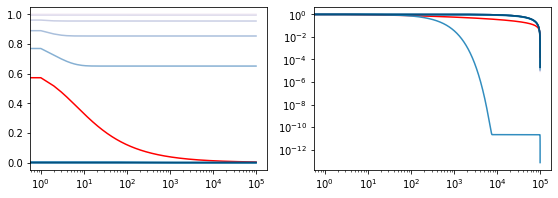

In [21]:
Tc_func  = lambda K: 1.0-K if K<0.5 else K

K  = 0.0
#T  = 0.6
H  = 0.0
d  = 0.0
l  = 0.0
xR = 0.0

t_transiente = 0
t_total      = 100000

x0 = np.array((0.7,0.7),dtype=np.float64)

T_valores = np.unique(np.append(np.linspace(0.01,1.5,10),Tc_func(K)))

x_dados = [None for _ in range(len(T_valores))]
C_dados = [None for _ in range(len(T_valores))]

for i,T in enumerate(T_valores):
    x_dados[i] = ktzsim.RodaSimulacaoMapa(K,T,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'kttanh')
    C_dados[i] = ktzsim.calc_AutoCorr(x_dados[i][:,0],False)



fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(9.33333,3))

line_color = plt.get_cmap('PuBu')

t = np.arange(t_transiente,t_total+1)

for i,(x,C,T) in enumerate(zip(x_dados,C_dados,T_valores)):
    color = np.array((1.0,0.0,0.0,1.0)) if T == Tc_func(K) else line_color(i/len(x_dados))
    ax[0].plot(t,x[:,0],'-',c=color)

    lags = np.arange(C.size)
    ax[1].plot(lags,C/C[0],'-',c=color)

ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.show()

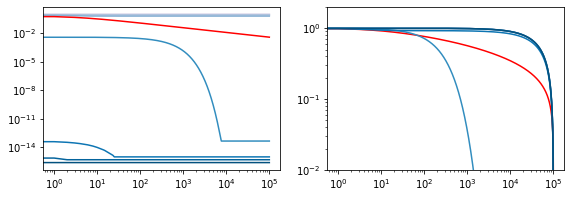

In [24]:



fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(9.33333,3))

line_color = plt.get_cmap('PuBu')

t = np.arange(t_transiente,t_total+1)

for i,(x,C,T) in enumerate(zip(x_dados,C_dados,T_valores)):
    color = np.array((1.0,0.0,0.0,1.0)) if T == Tc_func(K) else line_color(i/len(x_dados))
    ax[0].plot(t,x[:,0],'-',c=color)

    lags = np.arange(C.size)
    ax[1].plot(lags,C/C[0],'-',c=color)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim((1e-2,2))

plt.show()

# gradiente ascendente susceptibilidade dinamica

## K=0

d:\Dropbox\p\ufsc\pesquisa\simulacoes\mapa_ktz_py\modules\SimulacaoKTz.py:68: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  x_dados1       = RodaSimulacaoMapa(K,T,delta,lamb,xR,H, alpha_grad, suscept_max_grad,t_transiente,t_total,x0,mapa_nome)


T_max = 1.010150505050505    s_max = 97.58066494832406


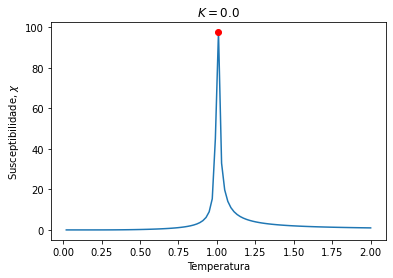

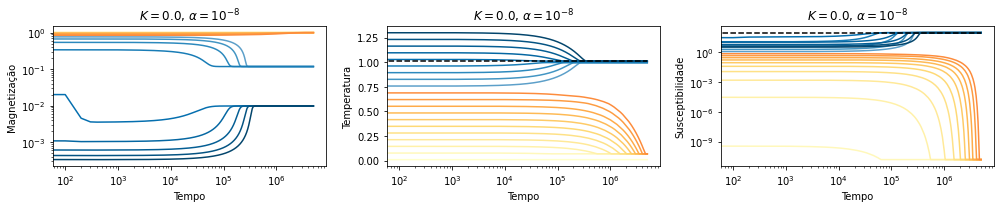

In [2]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.0

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.00000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()


###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max,t_transiente,t_total,x0,'ktsuscept')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.2

T_max = 0.8081404040404041    s_max = 121.04810488740398


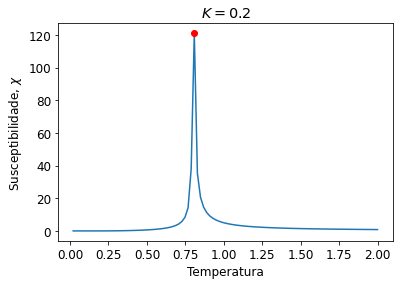

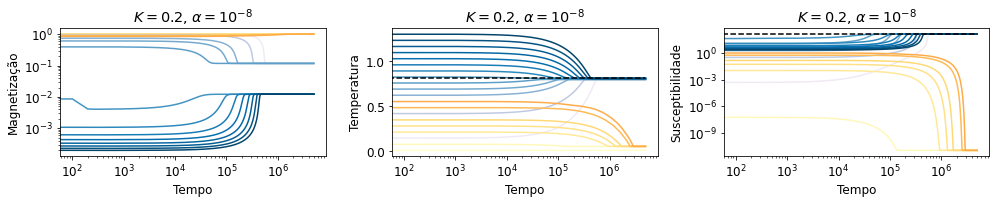

In [4]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.2

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.00000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()


###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max,t_transiente,t_total,x0,'ktsuscept')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.3

T_max = 0.7071353535353535    s_max = 137.5041532273797


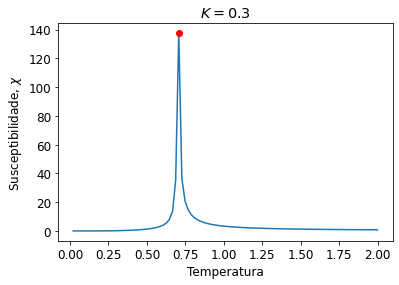

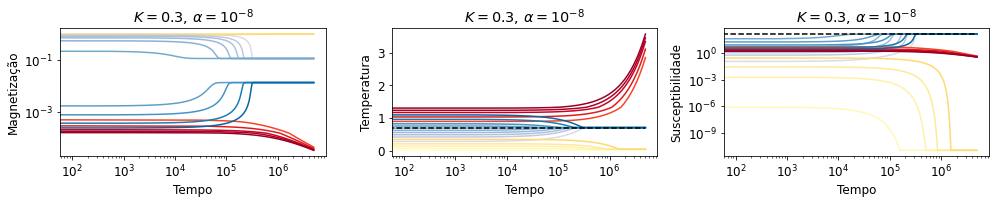

In [5]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.3

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.00000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()


###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max,t_transiente,t_total,x0,'ktsuscept')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

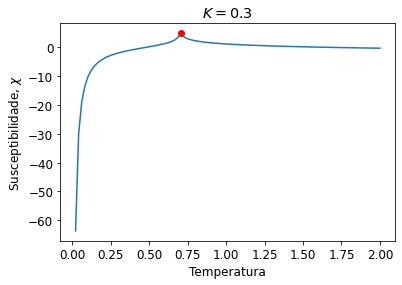

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,np.log(s_est_not_nan),'-')
ax.plot(T_max,np.log(s_max),'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()

## K=0.5

T_max = 0.5051252525252525    s_max = 188.2173459704608


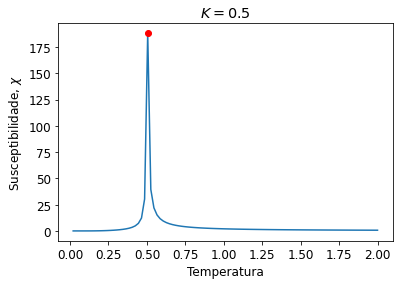

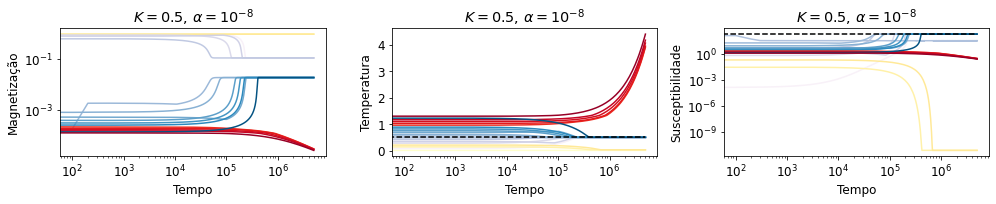

In [23]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.5

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.00000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()


###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max,t_transiente,t_total,x0,'ktsuscept')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.6

T_max = 0.40412020202020205    s_max = 242.70081782925573


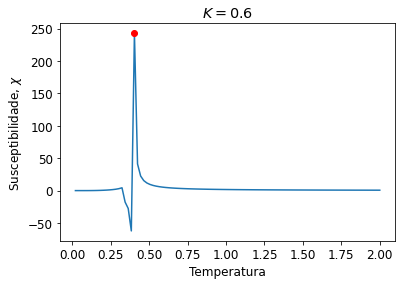

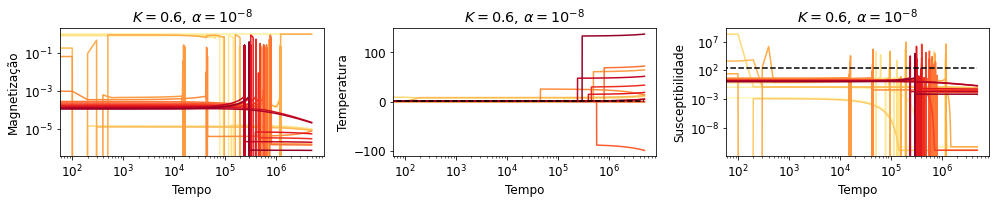

In [24]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.6

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.00000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()


###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max,t_transiente,t_total,x0,'ktsuscept')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

# gradiente ascendente log da susceptibilidade dinamica

## K=0

T_max = 1.010150505050505    s_max = 97.58066494832406


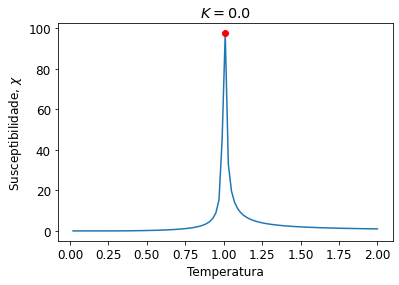

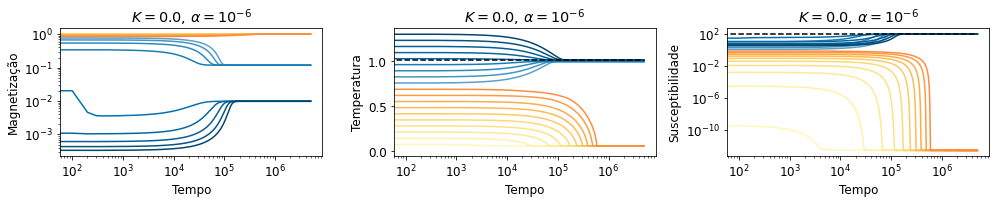

In [6]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.0

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()


s_max_log = np.log(s_max)

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max_log,t_transiente,t_total,x0,'ktsusceptlog')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.2

T_max = 0.8081404040404041    s_max = 121.04810488740398


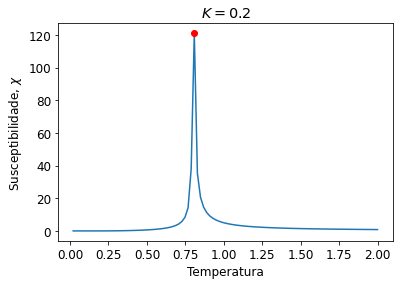

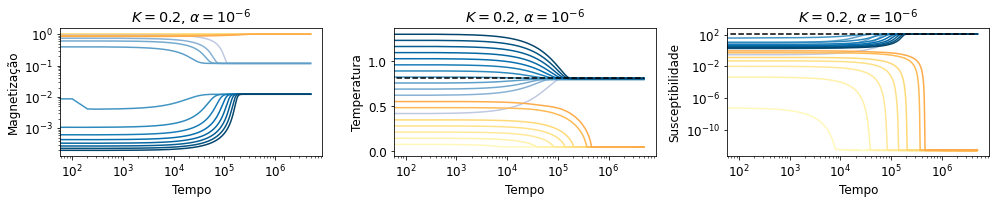

In [8]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.2

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()

s_max_log = np.log(s_max)

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max_log,t_transiente,t_total,x0,'ktsusceptlog')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.3

T_max = 0.7071353535353535    s_max = 137.5041532273797


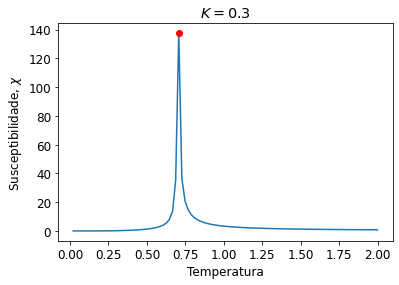

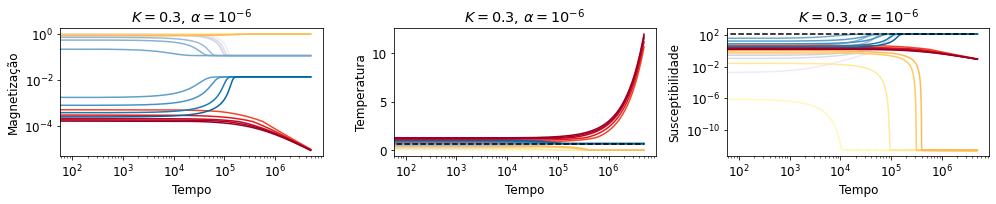

In [9]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.3

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()

s_max_log = np.log(s_max)


###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max_log,t_transiente,t_total,x0,'ktsusceptlog')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.5

T_max = 0.5051252525252525    s_max = 188.2173459704608


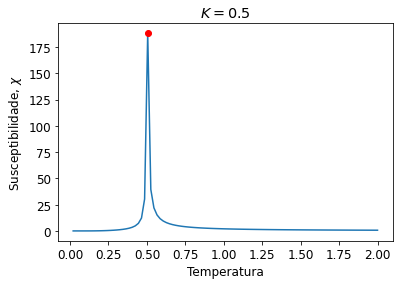

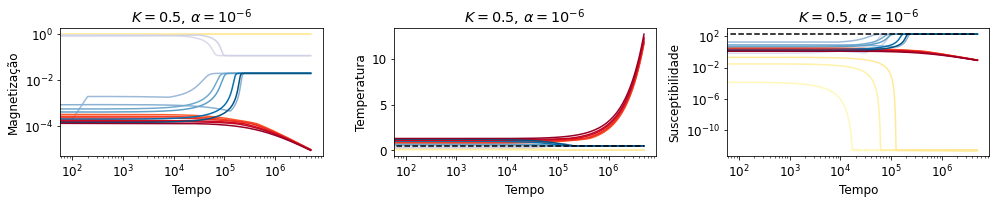

In [11]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.5

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()

s_max_log = np.log(s_max)

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max_log,t_transiente,t_total,x0,'ktsusceptlog')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.6

T_max = 0.40412020202020205    s_max = 242.70081782925573


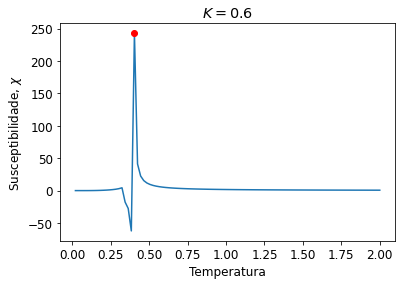

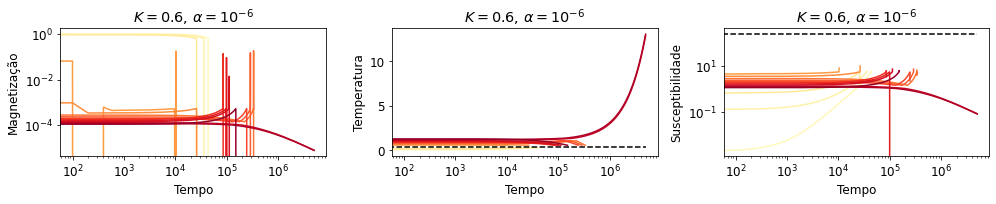

In [13]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.6

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
#T0_valores = [ 0.8, 0.9, 1.1, 1.2 ]

H       = 1e-4 # se for zero, o maximo da susceptibilidade eh infinito
alpha   = 0.000001 # passo do gradiente ascendente da susceptibilidade
epsilon = 1e-1 # precisao pra dizer que convergiu para T_max

###########################
###########################
###########################
########################### calculando max da susceptibilidade
###########################
###########################
###########################
T_valores         = np.linspace(0.0001,2,100)
t_transiente      = 10000
t_total           = 20000
_,_,_,s_est       = ktzsim.RodaSimulacao_Varios_T(K,T_valores,0.0,0.0,0.0,H,t_transiente,t_total,np.array([0.7,0.7]),'kttanh',seguir_ponto_fixo=True,usar_modulo_de_m=False,num_repete_bootstrap=0)
T_valores_not_nan = T_valores[np.logical_not(np.isnan(s_est))]
s_est_not_nan     = s_est[np.logical_not(np.isnan(s_est))]
n                 = np.argmax(s_est_not_nan) # acha o indice onde se encontra o valor maximo do vetor
s_max             = s_est_not_nan[n] # acha o valor maximo do vetor
T_max             = T_valores_not_nan[n]
print(f'T_max = {T_max}    s_max = {s_max}')

fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(T_valores_not_nan,s_est_not_nan,'-')
ax.plot(T_max,s_max,'or')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Susceptibilidade, $\\chi$')
ax.set_title(f'$K={K}$')
plt.show()

s_max_log = np.log(s_max)

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),T_max) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0
s0     = 1.0
teta_0 = 1.0
d0     = 1.0
delta0 = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0,s0,teta_0,d0,delta0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,0.0,0.0,0.0,H,alpha,s_max_log,t_transiente,t_total,x0,'ktsusceptlog')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=3,sharex=True,figsize=(14,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - T_max) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)
    ax[2].plot(t_dados,x_dados[i][:,2],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')
ax[2].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[1].hlines(T_max, -1, t_total+1, linestyle='--', color='k')
ax[2].hlines(s_max, -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')
ax[2].set_ylabel('Susceptibilidade')

ax[0].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[1].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')
ax[2].set_title(f'$K={K}$, $\\alpha={sci_notation(alpha)}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

# temperatura dinamica homeostatica

## K=0

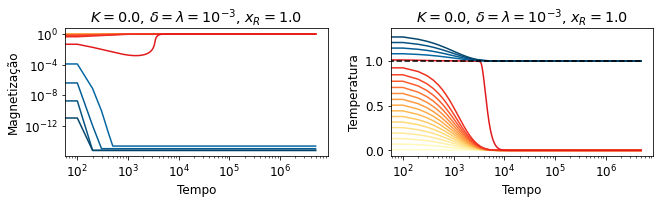

In [6]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.0
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktctanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.2

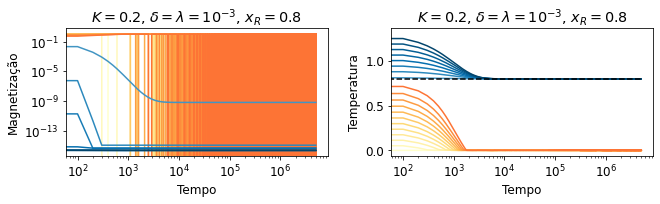

In [26]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.2
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktctanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.3

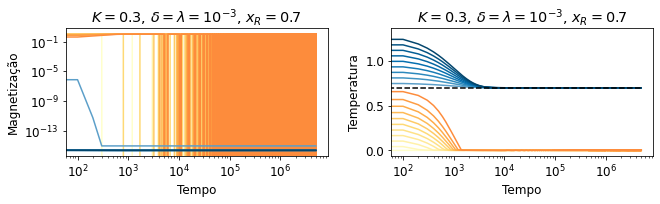

In [27]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.3
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktctanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.5

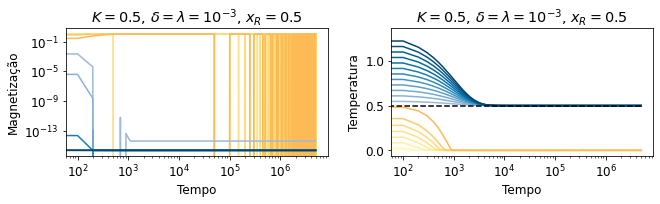

In [28]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.5
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktctanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.6

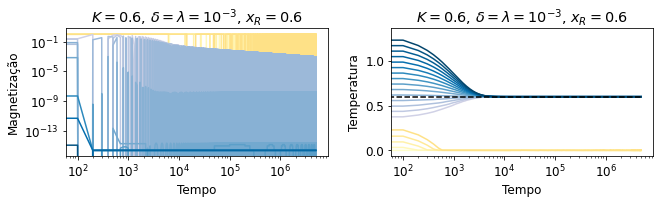

In [29]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.6
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktctanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=1.5

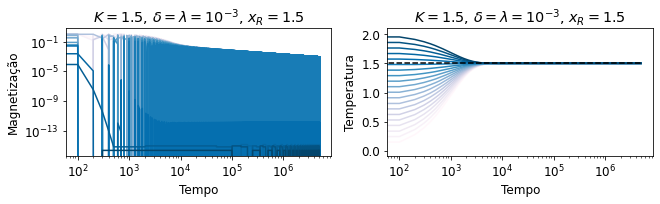

In [30]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 1.5
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,2.0,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktctanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

# temperatura dinamica abs(m)

## K=0

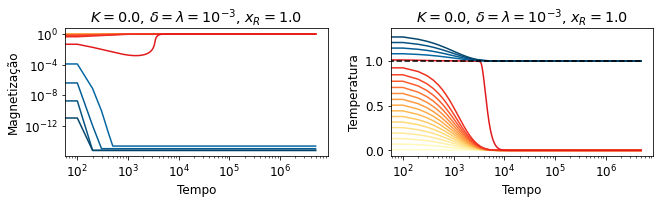

In [31]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.0
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktcabstanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.2

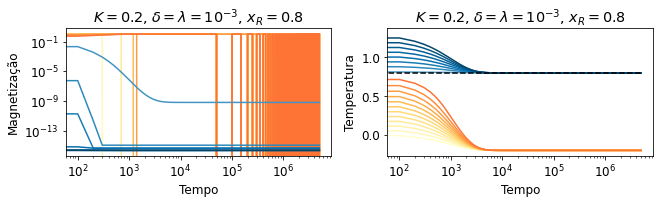

In [32]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.2
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktcabstanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.3

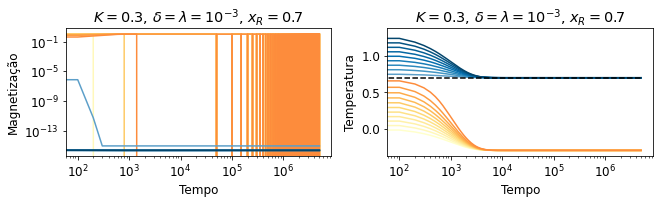

In [33]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.3
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktcabstanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.5

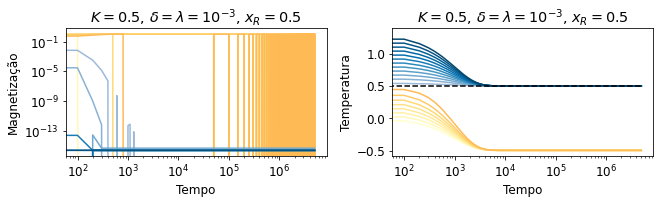

In [34]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.5
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktcabstanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=0.6

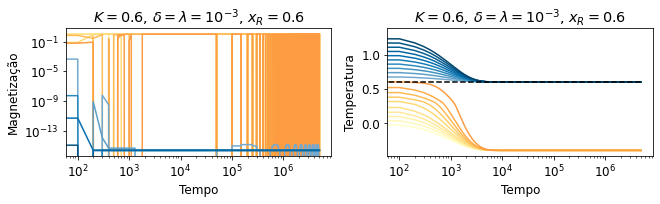

In [35]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 0.6
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,1.3,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktcabstanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()

## K=1.5

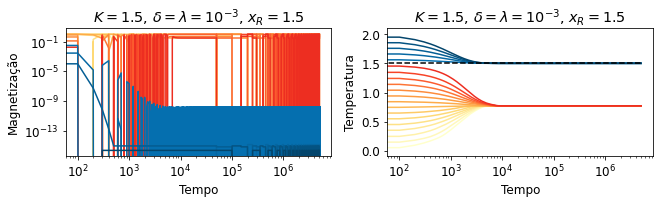

In [36]:
plt.rcParams.update({'font.size':12})

Tc_func  = lambda K: 1.0-K if K<0.5 else K

K     = 1.5
d     = 0.001
l     = 0.001
xR    = Tc_func(K)*d/l
H     = 0.0

# precisao de convergence para Tc
epsilon = 1e-1

###########################
###########################
###########################
########################### rodando para varias temperaturas iniciais
###########################
###########################
###########################

# valores iniciais de temperatura ignorando T_max (que deve ser obtido dinamicamente)
T0_valores = delete_elem(np.linspace(0.01,2.0,20),Tc_func(K)) #[ 0.8, 0.9, 1.1, 1.2 ]
# condicoes iniciais fixas
m0     = 1.0
y0     = 1.0


t_transiente = 0
t_total      = 5000000
num_t_plot   = 50000
x_dados = []
for T0 in T0_valores:
    x0 = numpy.array((m0,y0,T0),dtype=numpy.float64)
    x  = ktzsim.RodaSimulacaoMapa(K,T0,d,l,xR,H,0.0,0.0,t_transiente,t_total,x0,'ktcabstanh')
    x_dados.append(x[:,:4])
    x_dados[-1] = select_rows(numpy.delete(x_dados[-1], 1, axis=1), num_t_plot) # deleting column corresponding to y


# x_dados[i] -> corresponde a temperatura inicial T0_valores[i]
#               x_dados[i][:,0] -> magnetizacao
#               x_dados[i][:,1] -> temperatura
#               x_dados[i][:,2] -> susceptibilidade


fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(9.3333,3))

line_color_good = plt.get_cmap('PuBu')
line_color_bad  = plt.get_cmap('YlOrRd')

t_dados = select_elem(np.arange(t_total-t_transiente+1),num_t_plot)
for i,T0 in enumerate(T0_valores):
    if abs(x_dados[i][-1,1] - Tc_func(K)) <= epsilon:
        color = line_color_good(i/len(T0_valores))
    else:
        color = line_color_bad(i/len(T0_valores))
    ax[0].plot(t_dados,x_dados[i][:,0],label=f'T_0={T0}',c=color)
    ax[1].plot(t_dados,x_dados[i][:,1],label=f'T_0={T0}',c=color)


ax[0].set_xlabel('Tempo')
ax[1].set_xlabel('Tempo')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
#ax[1].set_yscale('log')

ax[1].hlines(Tc_func(K), -1, t_total+1, linestyle='--', color='k')

ax[0].set_ylabel('Magnetização')
ax[1].set_ylabel('Temperatura')

ax[0].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')
ax[1].set_title(f'$K={K}$, $\\delta=\\lambda={sci_notation(d)}$, $x_R={xR}$')

#ax[1].set_yticklabels(ax[1].get_yticks())

plt.tight_layout()

plt.show()